## 1. 패키지 로드

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

## 2. 데이터 로드

In [2]:
train = pd.read_csv('data/train.csv')
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [4]:
train = pd.read_csv('data/train.csv', index_col='PassengerId')
train.head(2)

# 'index_col'은 해당 열(PassengerId)을 인덱스로 사용할 수 있게 해줌.
# but 고유한 값이어야 함.

test = pd.read_csv('data/test.csv', index_col='PassengerId')
submission = pd.read_csv('data/gender_submission.csv', index_col='PassengerId')

print(train.shape, test.shape, submission.shape)

# shape: 해당 데이터 행렬의 크기 -> (행 숫자, 열 숫자)
# 즉 우리는 train의 891명의 데이터로, test의 418명의 생존여부를 예측해, submission 행렬의 크기에 맞춰 결과를 제출해야함.

(891, 11) (418, 10) (418, 1)


## 3. 데이터 분석 시작

### 3.0. 관련 배경지식이나 '이름' column을 활용하여 가설 수립

### 3.1. 타겟 변수 확인
맞춰야 하는 데이터 = 타겟 변수 (= 종속 변수)

한쪽으로 치우친 타겟 변수가 지나치게 많은 경우를 'Class imbalabced problem'이라 한다.  

카드 사기 거래 여부, 하늘에서 운석이 떨어지는 경우를 예를 들어 보면  
사기가 아닌 경우, 운석이 떨어지지 않는 경우가 압도적으로 많다.  

이때 별다른 처리 없이 머신러닝에게 데이터를 학습시킨다면,  
머신러닝이 모든 데이터를 0이라고 예측할지도 모른다.  
그리고 이 정확도를 보면, 상당히 높게 나온다.
하지만 이는 **의미없는 머신러닝 모델**이다.  

이럴 때는 여러 방법들을 통해 이 불균형을 해결한 후 머신러닝 알고리즘으로 학습을 시켜야 의미있는 예측을 한다.

Survived
0    549
1    342
Name: count, dtype: int64

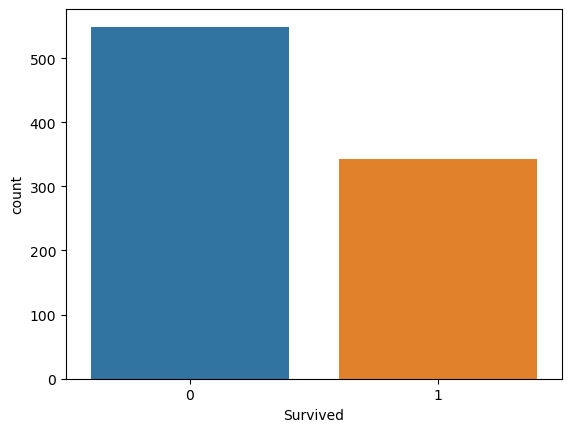

In [5]:
sns.countplot(train, x='Survived')

train['Survived'].value_counts()

### 3.2. 결측치 처리
데이터를 삭제하거나, 주변값 또는 대표값으로 결측치를 채워 넣는 방식으로 결측치를 처리한다.

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

train=train.drop(columns='Cabin')
test=test.drop(columns='Cabin')

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64
